In [ ]:
# loading libraries and data
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
#Reading train data and test data
train  = pd.read_csv('train_2kmZucJ.csv')
test = pd.read_csv('test_oJQbWVk.csv')

In [ ]:
#checking non vulgur tweets 
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
6,7,0,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/
7,8,0,New Type C charger cable #UK http://www.ebay.co.uk/itm/-/112598674021 … #bay #Amazon #etsy New Year #Rob Cross #Toby Young #EVEMUN #McMafia #Taylor #SPECTRE 2018 #NewYear #Starting 2018 #recipes #...
8,9,0,Bout to go shopping again listening to music #iphone #justme #music #likeforlike #followforfollow… http://instagr.am/p/Vj6bg5tLql/
9,10,0,Photo: #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor... http://tmblr.co/ZAjC0n1ms_Gp8
13,14,0,"I just made another crazy purchase lol my theory is 'Work hard, Play Hard' Lol #iPad #Apple #Shopping http://instagr.am/p/NUyFHvyE7I/"
15,16,0,From #DeepEllum towards #downtown #Dallas. #BigD #Saturday #RX100M3 #Sony #summer #urban http://instagram.com/p/pzJoOaQqZ4/


In [ ]:
#checking vulgur tweets 
train[train['label'] == 1].head(10)

,id,label,tweet
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!
5,6,1,iPhone software update fucked up my phone big time Stupid iPhones
10,11,1,hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.
11,12,1,Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade
12,13,1,Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo
14,15,1,@shaqlockholmes @sam_louise1991 the battery is so painful! I charge it overnight and by lunchtime battery is dead! #HateOrange.
18,19,1,The reason I don't have one. #iphone #suck #apple #truth #truthbetold #agree #fact #realitycheck #blackberrypic.twitter.com/zpggd7caZN
19,20,1,How is the apple store gunna be out of 5C screens ?!? It's Monday and ur the FUCKING APPLE STORE !!! #fuckingpissed
22,23,1,I've had this new ipod for four days? And this of button on the back broke... I accidentally hit it once
23,24,1,when your iPhone screen goes completely black and you keep getting texts all day but you can't FUCKING CHECK THEM #Apple #6thiPhone


In [ ]:
#Dimenson of train and test data shape
train.shape, test.shape

((7920, 3), (1953, 2))

In [ ]:
#Label distribution in train and test data
train["label"].value_counts()

0    5894
1    2026
Name: label, dtype: int64

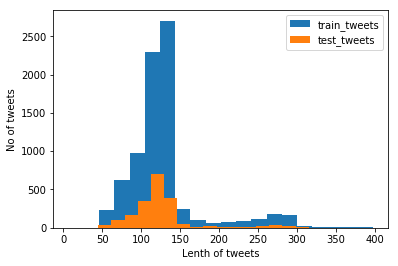

In [ ]:
#Distribution of length of tweets in terms of words in both training and testing data
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.xlabel("Lenth of tweets")
plt.ylabel("No of tweets")
plt.legend()
plt.show()

In [ ]:
# DATA CLEANING
#Appending training and testing data
combi = train.append(test, ignore_index=True)
combi.shape

C:\Users\Ujjawal\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(9873, 3)

In [ ]:
#User defined function to remove unwanted text patterns
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [ ]:
#removing twitter handles
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [ ]:
#REmoving puncutations,numners and special characers
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https goo gl h MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias http instagram com p YGEt JC JM
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect http fb me N LsUpCu
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I m wired I know I m George I was made that way #iphone #cute #daventry #home http instagr am p Li ujS k
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple won t even talk to me about a question I have unless I pay them for their stupid support
5,6,1.0,iPhone software update fucked up my phone big time Stupid iPhones,iPhone software update fucked up my phone big time Stupid iPhones
6,7,0.0,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/,Happy for us #instapic #instadaily #us #sony #xperia #xperiaZ https instagram com p z qGfWlvj
7,8,0.0,New Type C charger cable #UK http://www.ebay.co.uk/itm/-/112598674021 … #bay #Amazon #etsy New Year #Rob Cross #Toby Young #EVEMUN #McMafia #Taylor #SPECTRE 2018 #NewYear #Starting 2018 #recipes #...,New Type C charger cable #UK http www ebay co uk itm #bay #Amazon #etsy New Year #Rob Cross #Toby Young #EVEMUN #McMafia #Taylor #SPECTRE #NewYear #Starting #recipes #...
8,9,0.0,Bout to go shopping again listening to music #iphone #justme #music #likeforlike #followforfollow… http://instagr.am/p/Vj6bg5tLql/,Bout to go shopping again listening to music #iphone #justme #music #likeforlike #followforfollow http instagr am p Vj bg tLql
9,10,0.0,Photo: #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor... http://tmblr.co/ZAjC0n1ms_Gp8,Photo #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor http tmblr co ZAjC n ms Gp


In [ ]:
#Removing short words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally transparant silicon case Thanks uncle #yay #Sony #Xperia #sonyexperias http instagram YGEt
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love this Would #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect http LsUpCu
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know George made that #iphone #cute #daventry #home http instagr
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple even talk about question have unless them their stupid support


In [ ]:
#Tokenizing 
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

In [ ]:
tokenized_tweet.head()

0    [#fingerprint, #Pregnancy, Test, https, MfQV, #android, #apps, #beautiful, #cute, #health, #igers, #iphoneonly, #iphonesia, #iphone]
1                        [Finally, transparant, silicon, case, Thanks, uncle, #yay, #Sony, #Xperia, #sonyexperias, http, instagram, YGEt]
2                         [love, this, Would, #talk, #makememories, #unplug, #relax, #iphone, #smartphone, #wifi, #connect, http, LsUpCu]
3                                                      [wired, know, George, made, that, #iphone, #cute, #daventry, #home, http, instagr]
4                                [What, amazing, service, Apple, even, talk, about, question, have, unless, them, their, stupid, support]
Name: tidy_tweet, dtype: object

In [ ]:
#Normalize the tokenised tweet i.e 'STEMMING' bcoz love,loves,lovely,lovable all comes from sam base word love
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
#combining tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

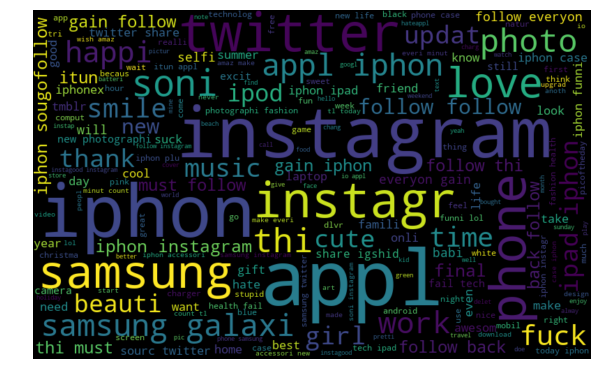

In [ ]:
# understanding common words used in tweets by wordcloud 
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

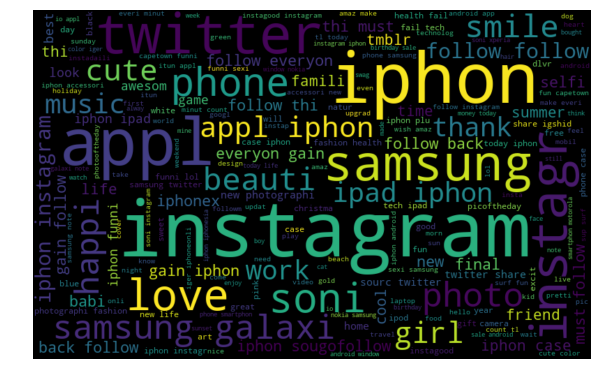

In [ ]:
#words in non vulgur tweets
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

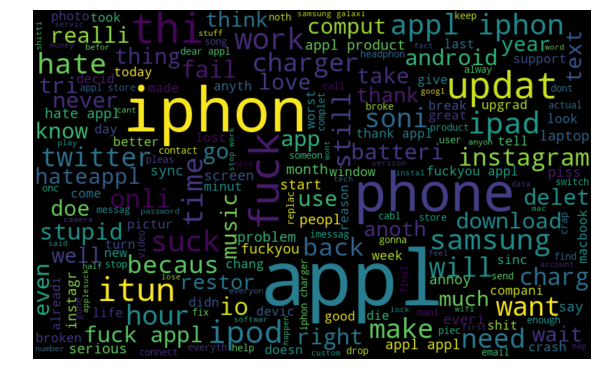

In [ ]:
#words in vulgur tweets
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#understanding impact of hashtag on tweets
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non vulgur tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [ ]:
print(HT_regular)

['fingerprint', 'pregnanc', 'android', 'app', 'beauti', 'cute', 'health', 'iger', 'iphoneonli', 'iphonesia', 'iphon', 'yay', 'soni', 'xperia', 'sonyexperia', 'talk', 'makememori', 'unplug', 'relax', 'iphon', 'smartphon', 'wifi', 'connect', 'iphon', 'cute', 'daventri', 'home', 'instap', 'instadaili', 'soni', 'xperia', 'xperiaz', 'bay', 'amazon', 'etsi', 'rob', 'tobi', 'evemun', 'mcmafia', 'taylor', 'spectr', 'newyear', 'start', 'recip', 'technolog', 'samsunggalaxi', 'iphonex', 'iphon', 'justm', 'music', 'likeforlik', 'followforfollow', 'fun', 'selfi', 'pool', 'water', 'soni', 'camera', 'picoftheday', 'sun', 'instagood', 'boy', 'cute', 'outdoor', 'ipad', 'appl', 'shop', 'deepellum', 'downtown', 'dalla', 'bigd', 'saturday', 'soni', 'summer', 'urban', 'iphon', 'iphonesia', 'iphon', 'instagood', 'instagram', 'photooftheday', 'tweegram', 'appl', 'art', 'easter', 'dear', 'friend', 'wife', 'bake', 'appl', 'pie', 'yay', 'phone', 'wallpap', 'wall', 'screen', 'galaxi', 'samsung', 'app', 'appl', '

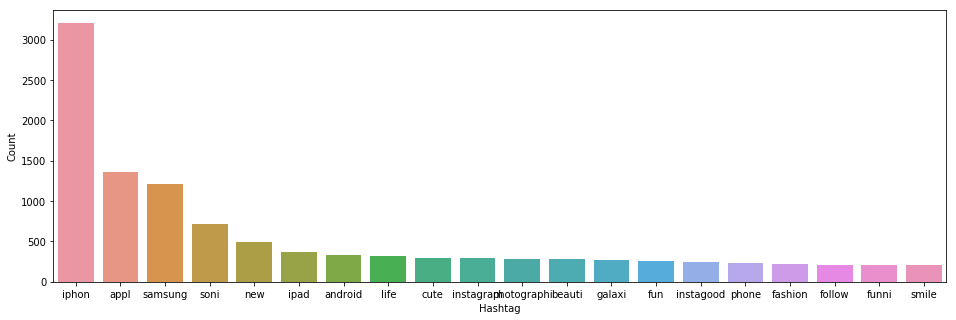

In [ ]:
#plotting top 20 hashtags of non vulgur tweets
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

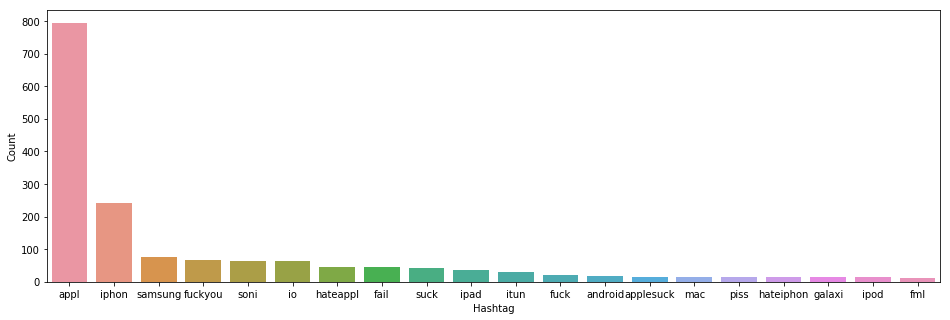

In [ ]:
#plotting top 20 hashtags of vulgur tweets
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [ ]:
#Extracting featires from cleaned tweets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

C:\Users\Ujjawal\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
#Bag of words features
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(9873, 1000)

In [ ]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(9873, 1000)

In [ ]:
#Word embedding
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(1837645, 2567180)

In [ ]:
model_w2v.wv.most_similar(positive="dinner")

[('#filchi', 0.7432796955108643),
 ('achi', 0.7276586294174194),
 ('nephew', 0.7180150747299194),
 ('tess', 0.7177435159683228),
 ('ofcours', 0.7123705148696899),
 ('#philippin', 0.7107148766517639),
 ('aurelio', 0.709598958492279),
 ('#kinder', 0.7088611721992493),
 ('#backpack', 0.7077872157096863),
 ('#dinner', 0.6979024410247803)]

In [ ]:
model_w2v.wv.most_similar(positive="appl")

[('#dumb', 0.5394233465194702),
 ('#fucktheiphon', 0.5342732667922974),
 ('wing', 0.5285364985466003),
 ('circletwelv', 0.5219514966011047),
 ('mac', 0.5207712650299072),
 ('protest', 0.5193337798118591),
 ('copycat', 0.5184682607650757),
 ('aren', 0.5181324481964111),
 ('complic', 0.517582893371582),
 ('cnet', 0.5171102285385132)]

In [ ]:
model_w2v.wv.most_similar(positive="iphon")

[('plate', 0.5844882130622864),
 ('unreal', 0.578773021697998),
 ('leak', 0.5747369527816772),
 ('rubber', 0.574097752571106),
 ('thin', 0.5632609128952026),
 ('idevic', 0.5622622966766357),
 ('corner', 0.560942530632019),
 ('typic', 0.5590072870254517),
 ('tough', 0.5582646131515503),
 ('#fuckappl', 0.5553120374679565)]

In [ ]:
model_w2v['food']

array([-0.3784487 ,  0.05216136,  0.1087295 ,  0.15695123,  0.07773552,
       -0.07116862,  0.10314764,  0.38255566, -0.1096426 , -0.13230437,
       -0.1332324 ,  0.25048247, -0.3507223 ,  0.09826011,  0.04490505,
       -0.09766111, -0.44937456, -0.05425438,  0.22663213, -0.536671  ,
       -0.02775341, -0.2633136 ,  0.20856656, -0.32883698,  0.13559781,
        0.24956673,  0.16110617,  0.21813795,  0.12568463,  0.04886993,
       -0.33654216,  0.453512  , -0.0096405 , -0.09794525, -0.2949224 ,
       -0.35328543,  0.55221117, -0.03000455,  0.3281295 , -0.07177758,
        0.33476892,  0.09149349, -0.04555389, -0.24053621,  0.305135  ,
        0.36838832,  0.19024557, -0.08409487,  0.29879916, -0.02339358,
       -0.05788046,  0.41011932,  0.247083  ,  0.15839848, -0.12589045,
        0.22626305,  0.22129503,  0.03462182,  0.14697666,  0.6540395 ,
       -0.20446119, -0.0931959 , -0.31906828, -0.47525123,  0.3272711 ,
        0.48221284, -0.15957442,  0.06811576, -0.22688945, -0.17

In [ ]:
len(model_w2v['food']) #The length of the vector is 200

200

In [ ]:
#Preparing vectors for tweets(We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.)
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
#preparing word2vec feature set
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(9873, 200)

In [ ]:
#from abobe cell we have 200 new features,wheraes in Bag of words and TF-IDF we had 1000 features

In [ ]:
#Doc2vec embedding
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [ ]:
#To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function.
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [ ]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [ ]:
#Result of labelled tweets
labeled_tweets[:6]

[LabeledSentence(words=['#fingerprint', '#pregnanc', 'test', 'http', 'mfqv', '#android', '#app', '#beauti', '#cute', '#health', '#iger', '#iphoneonli', '#iphonesia', '#iphon'], tags=['tweet_0']),
 LabeledSentence(words=['final', 'transpar', 'silicon', 'case', 'thank', 'uncl', '#yay', '#soni', '#xperia', '#sonyexperia', 'http', 'instagram', 'yget'], tags=['tweet_1']),
 LabeledSentence(words=['love', 'thi', 'would', '#talk', '#makememori', '#unplug', '#relax', '#iphon', '#smartphon', '#wifi', '#connect', 'http', 'lsupcu'], tags=['tweet_2']),
 LabeledSentence(words=['wire', 'know', 'georg', 'made', 'that', '#iphon', '#cute', '#daventri', '#home', 'http', 'instagr'], tags=['tweet_3']),
 LabeledSentence(words=['what', 'amaz', 'servic', 'appl', 'even', 'talk', 'about', 'question', 'have', 'unless', 'them', 'their', 'stupid', 'support'], tags=['tweet_4']),
 LabeledSentence(words=['iphon', 'softwar', 'updat', 'fuck', 'phone', 'time', 'stupid', 'iphon'], tags=['tweet_5'])]

In [ ]:
#training a doc2vec model
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

C:\Users\Ujjawal\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|█████████████████████████████████████████████████████████████████████████| 9873/9873 [00:00<00:00, 2476696.38it/s]


In [ ]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

In [ ]:
#Preparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(9873, 200)

In [ ]:
#MODEL BUILDING

In [ ]:
#1.Logestic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import svm

In [ ]:
bow.shape

(9873, 1000)

In [ ]:
train_bow = bow[:7920,:]
test_bow = bow[7920:,:]

In [ ]:
print(train_bow.shape)
print(test_bow.shape)
print(train['label'].shape)

(7920, 1000)
(1953, 1000)
(7920,)


In [ ]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [ ]:
print(xtrain_bow.shape)
print(xvalid_bow.shape)
#print(train['label'].shape)

(5544, 1000)
(2376, 1000)


In [ ]:
#Logistic regression model building
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.8061366806136679

In [ ]:
#Now let's make predictions for the test dataset and create a submission file.
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [ ]:
#Word2Vec features
train_w2v = wordvec_df.iloc[:7920,:]
test_w2v = wordvec_df.iloc[7920:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [ ]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.8201936376210235

In [ ]:
#Now let's make predictions for the test dataset and create a submission file.
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

ValueError: X has 1000 features per sample; expecting 200